In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_dummies = pd.get_dummies(df)


In [5]:
df_dummies[["y_yes","y_no"]]


,y_yes,y_no
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [6]:
df_store = df_dummies[["duration","y_no"]]

In [7]:
df_dummies.shape

(41188, 65)

In [8]:
df_dummies.drop('duration', axis=1, inplace=True)

In [9]:
df_dummies.shape

(41188, 64)

In [10]:
df_dummies.drop('y_no', axis=1, inplace=True)

In [11]:
df_dummies.shape

(41188, 63)

In [12]:
df_labels = df_dummies[["y_yes"]]

In [13]:
df_dummies.drop('y_yes', axis=1, inplace=True)

In [14]:
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df_dummies.values[0]

array([ 5.6000e+01,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.1000e+00,
        9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        1.0000e+00,  0.0000e+00])

In [16]:
clf = ExtraTreesClassifier(n_estimators= 100)
k_fold = KFold(n_splits=10)
score = []
for train_indices, test_indices in k_fold.split(df_dummies):
    clf.fit(df_dummies.values[train_indices], df_labels.values[train_indices])
    score.append(clf.score(df_dummies.values[test_indices], df_labels.values[test_indices]))
    print('Fold test accuracy:', score[-1])
print('Average accuracy:', np.mean(score))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.9618839524156348


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.956300072833212


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.9553289633406167


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.9225540179655256


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.930322893906288


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.9218256858460792


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.840009711094926


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.8664724447681476


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.8334142787761049


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Fold test accuracy: 0.5662943176299174
Average accuracy: 0.8754406338576454


In [17]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        print(t)
        plt.text(j, i, t,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
(36274.00)
(274.00)
(1729.00)
(2911.00)


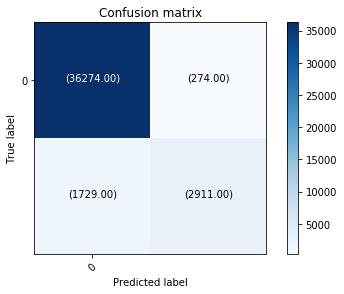

In [18]:
y_pred = clf.predict(df_dummies.values)
cnf_matrix = confusion_matrix(df_labels, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(df_labels))), normalize = False,
                      title='Confusion matrix')

In [19]:
type(df_dummies)
df_dummies.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

[ 0  1  7 36 38  9 22 28 31 39 41 18 55 23 58 56 57 54 10 27 30 21  8  4
 16 13  6 25 33 34 26  2 11 32 14 49 15 50  5 61 52 42 19  3 43 17 48 12
 59 44 60 40 37 20 47 51 24 45 29 46 35 53]
Feature ranking:
1. age (0.221795)
2. campaign (0.143909)
3. euribor3m (0.096526)
4. housing_no (0.023145)
5. housing_yes (0.023099)
6. job_admin. (0.019410)
7. marital_married (0.018346)
8. education_high.school (0.017756)
9. education_university.degree (0.017190)
10. loan_no (0.016102)
11. loan_yes (0.016017)
12. job_technician (0.016010)
13. day_of_week_mon (0.015843)
14. marital_single (0.015588)
15. day_of_week_wed (0.015240)
16. day_of_week_thu (0.015140)
17. day_of_week_tue (0.014943)
18. day_of_week_fri (0.014745)
19. job_blue-collar (0.013703)
20. education_basic.9y (0.013163)
21. education_professional.course (0.013006)
22. marital_divorced (0.012651)
23. nr.employed (0.012495)
24. emp.var.rate (0.012216)
25. job_services (0.010903)
26. job_management (0.010734)
27. cons.conf.idx (0.009832

(0, 0.24046045656558654)

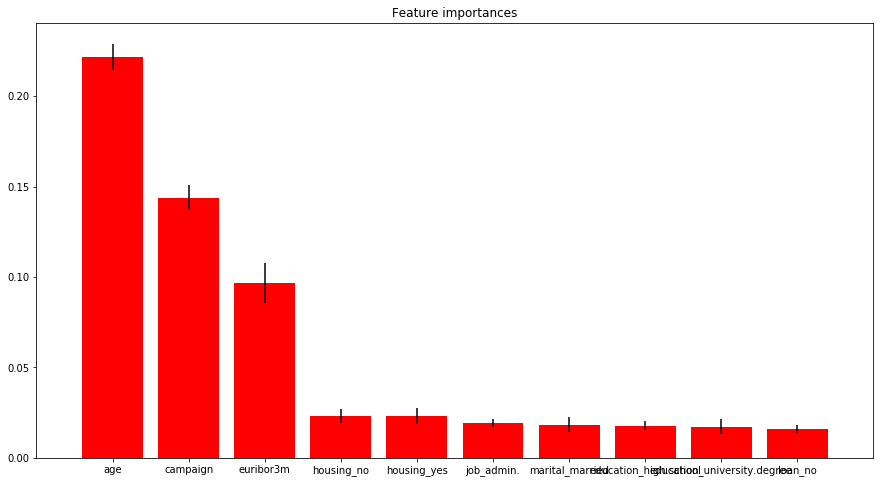

In [20]:
importances = clf.feature_importances_
n_features = len(df_dummies.columns)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

    
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(df_dummies.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

#plt.savefig("importances.png",bbox_inches='tight')
#plt.savefig("importances.pdf",bbox_inches='tight')

In [21]:
type(df_labels)

pandas.core.frame.DataFrame

In [22]:
type(df_labels.values)

numpy.ndarray

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

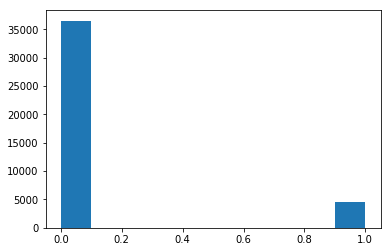

In [23]:
plt.hist(df_labels.values)